# Project: Wrangling and Analyze Data

## Data Gathering
In the cell below, gather **all** three pieces of data for this project and load them in the notebook. **Note:** the methods required to gather each data are different.
1. Directly download the WeRateDogs Twitter archive data (twitter_archive_enhanced.csv)

In [12]:
import pandas as pd

In [13]:
df_archive=pd.read_csv('twitter-archive-enhanced.csv')

df_archive.head(3)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None


2. Use the Requests library to download the tweet image prediction (image_predictions.tsv)

In [14]:
import requests 

url='https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(url) 

with open("image_predictions.tsv", mode='wb') as file : 
    file.write(response.content) 

In [15]:
df_prediction=pd.read_csv('image_predictions.tsv', sep='\t')

df_prediction.head(3)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True


3. Use the Tweepy library to query additional data via the Twitter API (tweet_json.txt)

In [ ]:
import tweepy
from tweepy import OAuthHandler
import json
from timeit import default_timer as timer

# Query Twitter API for each tweet in the Twitter archive and save JSON in a text file

# The following variables contain the keys to access Twitter Archive via its API 
consumer_key = 'HIDDEN'
consumer_secret = 'HIDDEN'
access_token = 'HIDDEN'
access_secret = 'HIDDEN'

# connexion using OAuth method
auth = OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

# request access to Twitter API
api = tweepy.API(auth, wait_on_rate_limit=True)

#extract the tweet ids from the first database 'df_archive', for which to gather additional data via the Twitter API
tweet_ids = df_archive.tweet_id.values
len(tweet_ids)

# Query Twitter's API for JSON data for each tweet ID in the Twitter archive
count = 0
fails_dict = {}
start = timer()
# Save each tweet's returned JSON as a new line in a .txt file
with open('tweet_json.txt', 'w') as outfile:
    for tweet_id in tweet_ids:
        count += 1
        print(str(count) + ": " + str(tweet_id))
        try:
            tweet = api.get_status(tweet_id, tweet_mode='extended')
            print("Success")
            json.dump(tweet._json, outfile)
            outfile.write('\n')
        except tweepy.TweepError as e:
            print("Fail")
            fails_dict[tweet_id] = e
            pass
end = timer()
print(end - start)
print(fails_dict)

In [16]:
import json

with open('tweet-json.txt') as file:
    df_add=pd.DataFrame((json.loads(line) for line in file), columns=['id','favorite_count','retweet_count'])

df_add.head()

,id,favorite_count,retweet_count
0,892420643555336193,39467,8853
1,892177421306343426,33819,6514
2,891815181378084864,25461,4328
3,891689557279858688,42908,8964
4,891327558926688256,41048,9774


## Assessing Data
In this section, detect and document at least **eight (8) quality issues and two (2) tidiness issue**. You must use **both** visual assessment
programmatic assessement to assess the data.

**Note:** pay attention to the following key points when you access the data.

* You only want original ratings (no retweets) that have images. Though there are 5000+ tweets in the dataset, not all are dog ratings and some are retweets.
* Assessing and cleaning the entire dataset completely would require a lot of time, and is not necessary to practice and demonstrate your skills in data wrangling. Therefore, the requirements of this project are only to assess and clean at least 8 quality issues and at least 2 tidiness issues in this dataset.
* The fact that the rating numerators are greater than the denominators does not need to be cleaned. This [unique rating system](http://knowyourmeme.com/memes/theyre-good-dogs-brent) is a big part of the popularity of WeRateDogs.
* You do not need to gather the tweets beyond August 1st, 2017. You can, but note that you won't be able to gather the image predictions for these tweets since you don't have access to the algorithm used.



Df_archive table

In [17]:
df_archive.tail(10).T

,2346,2347,2348,2349,2350,2351,2352,2353,2354,2355
tweet_id,666058600524156928,666057090499244032,666055525042405380,666051853826850816,666050758794694657,666049248165822465,666044226329800704,666033412701032449,666029285002620928,666020888022790149
in_reply_to_status_id,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
in_reply_to_user_id,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
timestamp,2015-11-16 01:01:59 +0000,2015-11-16 00:55:59 +0000,2015-11-16 00:49:46 +0000,2015-11-16 00:35:11 +0000,2015-11-16 00:30:50 +0000,2015-11-16 00:24:50 +0000,2015-11-16 00:04:52 +0000,2015-11-15 23:21:54 +0000,2015-11-15 23:05:30 +0000,2015-11-15 22:32:08 +0000
source,"<a href=""http://twitter.com/download/iphone"" r...","<a href=""http://twitter.com/download/iphone"" r...","<a href=""http://twitter.com/download/iphone"" r...","<a href=""http://twitter.com/download/iphone"" r...","<a href=""http://twitter.com/download/iphone"" r...","<a href=""http://twitter.com/download/iphone"" r...","<a href=""http://twitter.com/download/iphone"" r...","<a href=""http://twitter.com/download/iphone"" r...","<a href=""http://twitter.com/download/iphone"" r...","<a href=""http://twitter.com/download/iphone"" r..."
text,Here is the Rand Paul of retrievers folks! He'...,My oh my. This is a rare blond Canadian terrie...,Here is a Siberian heavily armored polar bear ...,This is an odd dog. Hard on the outside but lo...,This is a truly beautiful English Wilson Staff...,Here we have a 1949 1st generation vulpix. Enj...,This is a purebred Piers Morgan. Loves to Netf...,Here is a very happy pup. Big fan of well-main...,This is a western brown Mitsubishi terrier. Up...,Here we have a Japanese Irish Setter. Lost eye...
retweeted_status_id,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
retweeted_status_user_id,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
retweeted_status_timestamp,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
expanded_urls,https://twitter.com/dog_rates/status/666058600...,https://twitter.com/dog_rates/status/666057090...,https://twitter.com/dog_rates/status/666055525...,https://twitter.com/dog_rates/status/666051853...,https://twitter.com/dog_rates/status/666050758...,https://twitter.com/dog_rates/status/666049248...,https://twitter.com/dog_rates/status/666044226...,https://twitter.com/dog_rates/status/666033412...,https://twitter.com/dog_rates/status/666029285...,https://twitter.com/dog_rates/status/666020888...


In [7]:
df_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [18]:
df_archive.timestamp.dtype

dtype('O')

> timestamp column contains data of type 'Object' while it should be 'date'

In [19]:
df_archive.rating_denominator.unique()

array([ 10,   0,  15,  70,   7,  11, 150, 170,  20,  50,  90,  80,  40,
       130, 110,  16, 120,   2], dtype=int64)

In [20]:
df_archive.rating_denominator.value_counts()

10     2333
11        3
50        3
20        2
80        2
70        1
7         1
15        1
150       1
170       1
0         1
90        1
40        1
130       1
110       1
16        1
120       1
2         1
Name: rating_denominator, dtype: int64

> different values for the denominator, but it should always be equal to 10

In [22]:
df_verify=df_archive.query('doggo == "None" and floofer == "None" and puppo == "None" and pupper == "None"')


df_verify.pupper.unique()

array(['None'], dtype=object)

> There are dogs with no classification

- wrong data type for the column timeStamp
- links of the column 'source' are contained in an html ancor tag (<a></a>)
- useless informations: columns in_reply_to_status_id , retweeted_status_user_id, retweeted_status_timestamp and lines corresponding to retweets	
- different values for the denominator, but it should be always equal to 10
- There are dogs with no classification
<br>
<br>
- doggo, puppo, floofer and pupper columns are hard to extract information from them

#### predictions table

In [23]:
df_prediction.sample(5)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
1997,875021211251597312,https://pbs.twimg.com/media/DCSzF3NVoAAPzT4.jpg,2,West_Highland_white_terrier,0.714319,True,Siberian_husky,0.091913,True,Great_Pyrenees,0.046038,True
1645,808134635716833280,https://pbs.twimg.com/media/Cx5R8wPVEAALa9r.jpg,1,cocker_spaniel,0.740220,True,Dandie_Dinmont,0.061604,True,English_setter,0.041331,True
182,669351434509529089,https://pbs.twimg.com/media/CUoDk8mWsAAMyBL.jpg,1,cuirass,0.756829,False,breastplate,0.233520,False,bulletproof_vest,0.003812,False
1305,753375668877008896,https://pbs.twimg.com/media/CnSHLFeWgAAwV-I.jpg,1,bluetick,0.360071,True,crutch,0.134816,False,tripod,0.098207,False
37,666454714377183233,https://pbs.twimg.com/media/CT-5Bs-WUAA2JeC.jpg,1,dalmatian,0.278954,True,Labrador_retriever,0.237612,True,Great_Pyrenees,0.171106,True


In [24]:
df_prediction.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


> This dataset has 2075 entries while it should be 2356 to get merged with the first database

> unclear column names

In [25]:
df_prediction.jpg_url.duplicated().sum()

66

> There are duplicated images

#### Prediction table assessing findings
- This dataset has 2075 entries while it should be 2356 to get merged with the first database
- There are duplicated images
- unclear column names

### API Dataset assessing

In [26]:
df_add.head()

,id,favorite_count,retweet_count
0,892420643555336193,39467,8853
1,892177421306343426,33819,6514
2,891815181378084864,25461,4328
3,891689557279858688,42908,8964
4,891327558926688256,41048,9774


> 'id' column name is different from the other databases (should be merged lately)

In [27]:
df_add.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   id              2354 non-null   int64
 1   favorite_count  2354 non-null   int64
 2   retweet_count   2354 non-null   int64
dtypes: int64(3)
memory usage: 55.3 KB


> This dataframe contains only 2354 entries while it should be 2356 to be merged with the df_archive database

> The column 'id' name is incompatible with its equivalent in the other tables

### Quality issues

#### df_archive table
1. wrong data type for the column timeStamp

2. links of the column 'source' are contained in an html anchor tag (<a></a>)

3. useless informations: columns in_reply_to_status_id , retweeted_status_user_id, retweeted_status_timestamp and lines corresponding to retweets		

4. different values for the denominator, but it should be always equal to 10

5. There are dogs with no classification

#### prediction table
6. There are duplicated images

7. unclear column names

#### Spplementary table
8. The column 'id' name is incompatible with its equivalent in the other tables

### Tidiness issues
1. doggo, puppo, floofer and pupper columns are hard to extract information from them in the archive table

2. The three tables don't have the same number of entries (causes a problem while merging them)

## Cleaning Data
In this section, clean **all** of the issues you documented while assessing. 

**Note:** Make a copy of the original data before cleaning. Cleaning includes merging individual pieces of data according to the rules of [tidy data](https://cran.r-project.org/web/packages/tidyr/vignettes/tidy-data.html). The result should be a high-quality and tidy master pandas DataFrame (or DataFrames, if appropriate).

In [28]:
# Make copies of original pieces of data
archive_copy=df_archive.copy()
prediction_copy=df_prediction.copy()
supply_copy=df_add.copy()

### Issue #1: Merge datasets

#### Define:  
- Merge the archive, prediction and supply datasets
- rename 'id' column in supply_copy to 'tweet_id'	

#### Code

In [29]:
Dogs_data=pd.merge(archive_copy, prediction_copy, on='tweet_id')

In [30]:
#rename 'id' column in supply_copy to 'tweet_id'
supply_copy.rename(columns = {'id':'tweet_id'}, inplace = True)

#check if the name changed
supply_copy.columns

Index(['tweet_id', 'favorite_count', 'retweet_count'], dtype='object')

In [31]:
#merge Dogs_data with supply_copy
Dogs_data=pd.merge(Dogs_data, supply_copy, on='tweet_id')

#### Test

In [32]:
Dogs_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2073 entries, 0 to 2072
Data columns (total 30 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2073 non-null   int64  
 1   in_reply_to_status_id       23 non-null     float64
 2   in_reply_to_user_id         23 non-null     float64
 3   timestamp                   2073 non-null   object 
 4   source                      2073 non-null   object 
 5   text                        2073 non-null   object 
 6   retweeted_status_id         79 non-null     float64
 7   retweeted_status_user_id    79 non-null     float64
 8   retweeted_status_timestamp  79 non-null     object 
 9   expanded_urls               2073 non-null   object 
 10  rating_numerator            2073 non-null   int64  
 11  rating_denominator          2073 non-null   int64  
 12  name                        2073 non-null   object 
 13  doggo                       2073 

### Issue #2: Useless Columns and lines (the retweets)

#### Define
1. drop useless lines corresponding to reweets, knowing that we only need the originals for the analysis phase
<br><br>
2. drop the useless columns which are:
- in_reply_to_status_id 
- in_reply_to_user_id  
- retweeted_status_user_id 
- retweeted_status_timestamp
- retweeted_status_id   

#### Code

In [49]:
# check if there is non-original tweets
a = Dogs_data.query('retweeted_status_user_id.notnull()', engine='python')
a.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 79 entries, 32 to 1978
Data columns (total 30 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    79 non-null     int64  
 1   in_reply_to_status_id       0 non-null      float64
 2   in_reply_to_user_id         0 non-null      float64
 3   timestamp                   79 non-null     object 
 4   source                      79 non-null     object 
 5   text                        79 non-null     object 
 6   retweeted_status_id         79 non-null     float64
 7   retweeted_status_user_id    79 non-null     float64
 8   retweeted_status_timestamp  79 non-null     object 
 9   expanded_urls               79 non-null     object 
 10  rating_numerator            79 non-null     int64  
 11  rating_denominator          79 non-null     int64  
 12  name                        79 non-null     object 
 13  doggo                       79 non

In [54]:
#drop the retweets' lines
Dogs_data.drop(Dogs_data.query('retweeted_status_user_id.notnull()', engine='python').index, inplace = True)

### Test

In [56]:
#verify
a = Dogs_data.query('retweeted_status_user_id.notnull()', engine='python')
a.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 0 entries
Data columns (total 30 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    0 non-null      int64  
 1   in_reply_to_status_id       0 non-null      float64
 2   in_reply_to_user_id         0 non-null      float64
 3   timestamp                   0 non-null      object 
 4   source                      0 non-null      object 
 5   text                        0 non-null      object 
 6   retweeted_status_id         0 non-null      float64
 7   retweeted_status_user_id    0 non-null      float64
 8   retweeted_status_timestamp  0 non-null      object 
 9   expanded_urls               0 non-null      object 
 10  rating_numerator            0 non-null      int64  
 11  rating_denominator          0 non-null      int64  
 12  name                        0 non-null      object 
 13  doggo                       0 non-null      obj

### Code

In [57]:
#drop unecessary columns
Dogs_data.drop(['in_reply_to_status_id', 'in_reply_to_user_id', 'retweeted_status_user_id',
                'retweeted_status_timestamp','retweeted_status_id'] , axis=1, inplace= True)

#### Test

In [23]:
Dogs_data.columns

Index(['tweet_id', 'timestamp', 'source', 'text', 'expanded_urls',
       'rating_numerator', 'rating_denominator', 'name', 'doggo', 'floofer',
       'pupper', 'puppo', 'jpg_url', 'img_num', 'p1', 'p1_conf', 'p1_dog',
       'p2', 'p2_conf', 'p2_dog', 'p3', 'p3_conf', 'p3_dog', 'favorite_count',
       'retweet_count'],
      dtype='object')

### Issue #3: Unsignificant Columns' names

#### Define
Rename those columns:
- p1 -> first_prediction
- p1_conf -> first_prediction_confidence
- p1_dog -> first_prediction_class
- p2 -> second_prediction
- p2_conf -> second_prediction_confidence
- p2_dog -> second_prediction_class
- p3 -> third_prediction
- p3_conf -> third_prediction_confidence
- p3_dog -> third_prediction_class

#### Code

In [58]:
Dogs_data.rename(columns = {'p1':'first_prediction','p1_conf':'first_prediction_confidence','p1_dog':'first_prediction_class',
                            'p2':'second_prediction','p2_conf':'second_prediction_confidence','p2_dog':'second_prediction_class',
                            'p3':'third_prediction','p3_conf':'third_prediction_confidence','p3_dog':'third_prediction_class'},
                 inplace = True)

### Test

In [59]:
Dogs_data.columns

Index(['tweet_id', 'timestamp', 'source', 'text', 'expanded_urls',
       'rating_numerator', 'rating_denominator', 'name', 'doggo', 'floofer',
       'pupper', 'puppo', 'jpg_url', 'img_num', 'first_prediction',
       'first_prediction_confidence', 'first_prediction_class',
       'second_prediction', 'second_prediction_confidence',
       'second_prediction_class', 'third_prediction',
       'third_prediction_confidence', 'third_prediction_class',
       'favorite_count', 'retweet_count'],
      dtype='object')

### Issue #4: Wrong data type for the column timeStamp

#### Define
Convert the type of 'timestamp' column from Object to Data

#### Code

In [60]:
Dogs_data.timestamp=pd.to_datetime(Dogs_data['timestamp'])

#### Test

In [61]:
Dogs_data.timestamp.dtype

datetime64[ns, UTC]

### Issue #5: Certain denominator values are different from 10

#### Define
Drop rows where denominator values are different from 10.

#### Code

In [62]:
Dogs_data.drop(Dogs_data[Dogs_data['rating_denominator'] != 10].index, inplace = True)

#### Test

In [63]:
Dogs_data.query('rating_denominator!= 10')

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,...,first_prediction_confidence,first_prediction_class,second_prediction,second_prediction_confidence,second_prediction_class,third_prediction,third_prediction_confidence,third_prediction_class,favorite_count,retweet_count


### Issue #6: Dogs with no classification

#### Define
Drop rows where dogs have no classification 

#### Code

In [64]:
Dogs_data.drop(Dogs_data.query('doggo == "None" and floofer == "None" and puppo == "None" and pupper == "None"').index, inplace = True)


#### Test

In [65]:
Dogs_data.query('doggo == "None" and floofer == "None" and puppo == "None" and pupper == "None"')

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,...,first_prediction_confidence,first_prediction_class,second_prediction,second_prediction_confidence,second_prediction_class,third_prediction,third_prediction_confidence,third_prediction_class,favorite_count,retweet_count


### Issue #7: Duplicated images

#### Define
Drop duplicated images  

#### Code

In [66]:
Dogs_data.drop_duplicates(inplace=True)

#### Test

In [67]:
sum(Dogs_data.duplicated())

0

### Issue #8: Links of the column 'source' are contained in an html anchor tag ()

#### Define
extract links from the anchor tags and affecting them as values to the 'source' column   

#### Code

In [68]:
Dogs_data["source"] = Dogs_data["source"].str.split('>').str[-2].str[:-3]

#### Test

In [69]:
Dogs_data.source.unique()

array(['Twitter for iPhone', 'Twitter Web Client', 'TweetDeck'],
      dtype=object)

### Issue #9: doggo, puppo, floofer and pupper columns are hard to extract information from them in the archive table

#### Define
Melt the doggo, puppo, floofer and pupper columns to a classification column 
In case a dog has more than one classification assigned, only one will be taken into consideration: the priority is for the Doggo, followed by Floofer then Pupper then Puppo.

#### Code

In [70]:
Dogs_data.columns

Index(['tweet_id', 'timestamp', 'source', 'text', 'expanded_urls',
       'rating_numerator', 'rating_denominator', 'name', 'doggo', 'floofer',
       'pupper', 'puppo', 'jpg_url', 'img_num', 'first_prediction',
       'first_prediction_confidence', 'first_prediction_class',
       'second_prediction', 'second_prediction_confidence',
       'second_prediction_class', 'third_prediction',
       'third_prediction_confidence', 'third_prediction_class',
       'favorite_count', 'retweet_count'],
      dtype='object')

In [71]:
#Unpivoting the DataFrame from wide to long format using the melt function
Dogs_data = pd.melt(Dogs_data, 
                    id_vars =["tweet_id", "timestamp", "source", "text", "expanded_urls", "rating_numerator", "rating_denominator", "name"],
                    value_vars = ["doggo", "floofer", "pupper", "puppo"],
                    var_name = "classification", 
                    value_name = "value")

#### Test

In [72]:
Dogs_data.drop(Dogs_data.query('value=="None"').index, inplace = True)

In [73]:
Dogs_data.value.unique()

array(['doggo', 'floofer', 'pupper', 'puppo'], dtype=object)

## Storing Data
Save gathered, assessed, and cleaned master dataset to a CSV file named "twitter_archive_master.csv".

In [74]:
Dogs_data.to_csv('twitter_archive_master.csv', index=False)

## Analyzing and Visualizing Data
In this section, analyze and visualize your wrangled data. You must produce at least **three (3) insights and one (1) visualization.**

In [75]:
import matplotlib.pyplot as plt

In [76]:
#import the cleaned dataset
df=pd.read_csv('twitter_archive_master.csv')
df.head(3)

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,classification,value
0,890240255349198849,2017-07-26 15:59:51+00:00,Twitter for iPhone,This is Cassie. She is a college pup. Studying...,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,doggo
1,884162670584377345,2017-07-09 21:29:42+00:00,Twitter for iPhone,Meet Yogi. He doesn't have any important dog m...,https://twitter.com/dog_rates/status/884162670...,12,10,Yogi,doggo,doggo
2,872967104147763200,2017-06-09 00:02:31+00:00,Twitter for iPhone,Here's a very large dog. He has a date later. ...,https://twitter.com/dog_rates/status/872967104...,12,10,None,doggo,doggo


In [77]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 317 entries, 0 to 316
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   tweet_id            317 non-null    int64 
 1   timestamp           317 non-null    object
 2   source              317 non-null    object
 3   text                317 non-null    object
 4   expanded_urls       317 non-null    object
 5   rating_numerator    317 non-null    int64 
 6   rating_denominator  317 non-null    int64 
 7   name                317 non-null    object
 8   classification      317 non-null    object
 9   value               317 non-null    object
dtypes: int64(3), object(7)
memory usage: 24.9+ KB


### Insights:
1. Most popular dog name

2. The Dog stage with the highest rating

3. Most used source for the WeRateDogs users

### Visualization

#### Most popular dog name

In [78]:
df.name.value_counts()

None        123
a             4
just          3
Cooper        3
Chuckles      2
           ... 
Laika         1
Sophie        1
Huck          1
Winnie        1
Bayley        1
Name: name, Length: 174, dtype: int64

> Some dog names are missing in this dataset and other are just 'a' .

In [79]:
# make copy of our dataset then drop the inappropriate names : 'a' and 'None'
df_copy=df.copy()

In [80]:
df_copy.drop(df_copy[(df_copy.name == 'None') ].index , inplace=True)

In [81]:
df_copy.drop(df_copy[(df_copy.name == 'a') ].index , inplace=True)

In [82]:
#verify all the 'none' names are dropped
df_copy.query('name == "None" or name == "a" ')

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,classification,value


Text(0.5, 1.0, 'Most popular dog names')

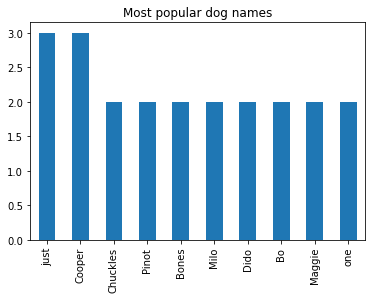

In [88]:
df_copy.name.value_counts().head(10).plot(kind='bar')
plt.title('Most popular dog names')

> The most popular dog name is Just and Cooper.

#### The Dog stage with the highest rating

In [89]:
df.describe()

,tweet_id,rating_numerator,rating_denominator
count,3.170000e+02,317.000000,317.0
mean,7.466653e+17,11.097792,10.0
std,6.469163e+16,1.980896,0.0
min,6.721600e+17,3.000000,10.0
25%,6.860079e+17,10.000000,10.0
50%,7.352560e+17,11.000000,10.0
75%,8.022393e+17,12.000000,10.0
max,8.902403e+17,27.000000,10.0


In [90]:
df.query('rating_numerator == 27')

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,classification,value
117,778027034220126208,2016-09-20 00:24:34+00:00,Twitter for iPhone,This is Sophie. She's a Jubilant Bush Pupper. ...,https://twitter.com/dog_rates/status/778027034...,27,10,Sophie,pupper,pupper


In [91]:
(df.groupby('value')['rating_numerator'].count()).to_frame().T

value,doggo,floofer,pupper,puppo
rating_numerator,74,8,212,23


> Puppers get the highest ratings.

#### Most used source for the WeRateDogs users

Text(0.5, 1.0, 'Most used source for the WeRateDogs users')

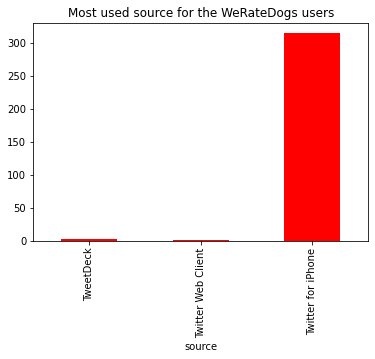

In [92]:
df.groupby('source')['source'].count().plot(kind='bar', color='red')
plt.title('Most used source for the WeRateDogs users')

> Twitter for iPhone is most used by WeRateDogs users